In [3]:
import numpy as np
import math
from sympy import *
import matplotlib
import matplotlib.pyplot as plt
from pylab import figure, cm

# Gradient-type Methods

Find the local minimum for the function $\min_{x\in \mathbb{R}^n}f(x)$

$f(x,y)=x^2+2y^2-xy$

In [25]:
#define variables and formula
def f_val(x,y):
    
    return x*y

#Value of function
#f_val = lambdify([x,y],f)

# Visualisation 

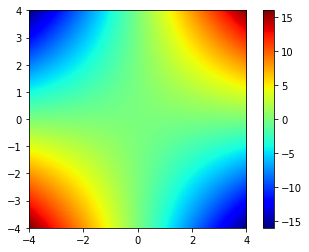

In [27]:
x1_min = -4.0
x1_max = 4.0
x2_min = -4.0
x2_max = 4.0

x1, x2 = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

y = f_val(x1,x2)

plt.imshow(y,extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')


plt.colorbar()

plt.show()

In [28]:
def fx(x,y):
    return y

def fy(x,y):
    return x

In [29]:
def step_size_basic(step_size,k):
    
    return step_size/(k+1)

def descent_direction(w):
    #w is the current iteration
    #the descent direction is the opposite direction of the gradient
    
    return np.array([fx(w[0],w[1]),fy(w[0],w[1])])

#def step_size_Borwein(step_size,k,Type,w_history,f_history):


def gradient_descent(max_iterations,Tol,w_init,step_size):

    w = w_init
    # store the history of w and f
    w_history = w
    f_history = f_val(w[0],w[1])
    
    #update direction
    delta_w = np.zeros(len(w))
    i = 0
    diff = 1.0e10   #+infinity
    
    #stopping condition: (1) the number of iteration is larger than max_iterations, or
    #(2) the optimality gap is smaller than threshold
    
    while  i < max_iterations and diff>Tol:
        delta_w = - step_size_basic(step_size,i)*descent_direction(w)
        
        w = w+delta_w
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,f_val(w[0],w[1])))
        
        # update iteration number and diff between successive values of objective function
        diff = np.sum(descent_direction(w)*descent_direction(w))
        i+=1
    return w_history,f_history

# Visualisation

In [43]:
w_init = [2,2]
w_History,f_History = gradient_descent(20,1.0e-5,w_init,1)

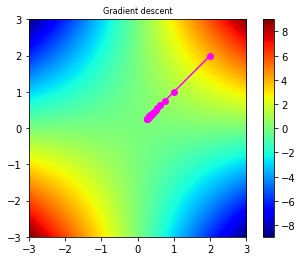

In [44]:
x1_min = -3.0
x1_max = 3.0
x2_min = -3.0
x2_max = 3.0

x1, x2 = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

y = f_val(x1,x2)

plt.imshow(y,extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')

plt.colorbar()

plt.title("Gradient descent" , fontsize=8)

plt.plot(w_History[:,0],w_History[:,1],marker='o',c='magenta') 

plt.show()